In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image


import os


<h1><center> Video Games Sales Analysis And Visualization </center></h1>
 

# Overview

> This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of [vgchartz.com](https://www.vgchartz.com/).\
    The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape.\
    It is based on BeautifulSoup using Python.\
    There are 16,598 records. 2 records were dropped due to incomplete information.

## Fields include

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

## Objective

We want to have a big picture of video game industry. If we go to the market, how should we chose our first Game.

# Data Cleaning

In [3]:
data = pd.read_csv('input/videogamesales/vgsales.csv')

In [4]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
data.dropna(inplace=True)
data['Year'] = data.loc[:,'Year'].astype(int)

In [7]:
data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Video game console and PC are the biggest subcategory in the market.Sony,Microsoft and Nintendo are the Big Three seizing console market.

- Sony: PS ,PS2, PS3, PS4, PSV, PSP
- Microsoft: XB, X360, XOne
- Nintendo: Wii,WiiU, NES, 3DS, GB, GBA,N64,NG,GC, 

We would like to see the market share of the past years.

In [8]:
df = data.copy()
df.pivot_table(index ='Year', columns='Genre', values='Global_Sales', aggfunc='sum')

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,0.34,NaN,0.77,2.71,NaN,NaN,NaN,NaN,7.07,NaN,0.49,NaN
1981,14.84,NaN,NaN,NaN,6.93,2.24,0.48,NaN,10.04,0.45,0.79,NaN
1982,6.52,NaN,NaN,0.87,5.03,10.03,1.57,NaN,3.79,NaN,1.05,NaN
1983,2.86,0.40,NaN,2.14,6.93,0.78,NaN,NaN,0.48,NaN,3.20,NaN
1984,1.85,NaN,NaN,1.45,0.69,3.14,5.95,NaN,31.10,NaN,6.18,NaN
1985,3.52,NaN,1.05,NaN,43.17,3.21,NaN,NaN,1.00,0.03,1.96,NaN
1986,13.74,NaN,NaN,NaN,9.39,NaN,1.96,2.52,3.89,NaN,5.57,NaN
1987,1.12,4.38,5.42,NaN,1.74,NaN,NaN,4.65,0.71,NaN,3.72,NaN
1988,1.75,NaN,NaN,NaN,27.73,5.58,2.14,5.88,0.51,0.03,3.60,NaN


The data after 2015 start to missing, which may couse by lack of information. We would drop the data after 2015

In [9]:
df = df[df['Year'] <= 2015]
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Explore Data Analysis

## 1. Big Picture

In [10]:
Global_sales_by_year = df.groupby('Year')['Global_Sales'].sum()

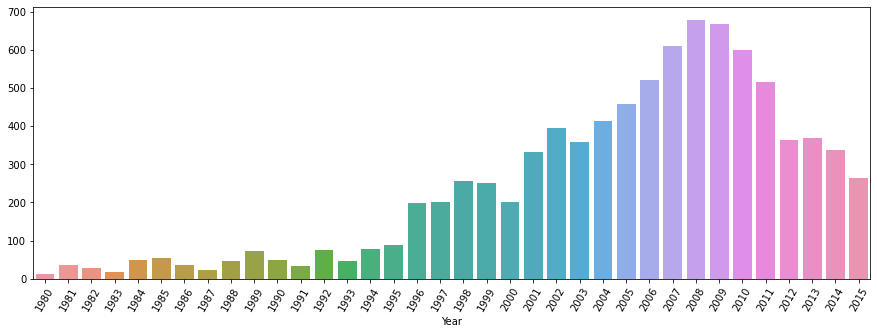

In [11]:
plt.figure(figsize=(15,5))
sns.barplot(x=Global_sales_by_year.index, y=Global_sales_by_year.values)
plt.xticks(rotation=60)
plt.show()

**Introductory Stage**: The market is stable before 1996,The total annual sales flucate around 50 millions annual.

**Growth Stage**: The growth of annual total sales is quite steady before 2006.

**Maturity Stage**: The annual total  sales peak at 2008 with about 700 millions, and then start to drop. 

**Decline Stage**: The growth of annual total sales became negative.

If we want to go into the market, we will get ready for a real battle.

## 2. Platform

In [12]:
sony_console = ['PS', 'PS2', 'PS3', 'PS4', 'PSV', 'PSP']
microsoft_console = ['XB', 'X360', 'XOne']
nintendo_console = ['Wii','WiiU', 'NES', '3DS', 'GB', 'GBA','N64','GC','DS','SNES']
atari_console = ['2600']
sega_console = ['GEN', 'DC', 'SAT','SCD','GG']

def get_console_company(data):
    if data in (sony_console):
        return 'Sony'
    elif data in (microsoft_console):
        return 'Microsoft'
    elif data in (nintendo_console):
        return 'Nintendo'
    elif data in (sega_console):
        return 'Sega'
    elif data == 'PC':
        return 'PC'
    else:
        return 'Others'

df.loc[:,'Platform_manfacturer'] = df['Platform'].apply(get_console_company)
Global_sales_by_year_platform = df.groupby(['Year','Platform_manfacturer'])[['Global_Sales']].sum().reset_index()
Global_sales_by_year_platform = Global_sales_by_year_platform.merge(Global_sales_by_year,on=['Year'], how='left')
Global_sales_by_year_platform['Market_share'] = 100* Global_sales_by_year_platform['Global_Sales_x'] / Global_sales_by_year_platform['Global_Sales_y']
platform_list = df.groupby('Platform_manfacturer')['Global_Sales'].sum().sort_values(ascending=False).index
color_list = sns.color_palette("tab20",n_colors=Global_sales_by_year_platform['Platform_manfacturer'].nunique())

In [13]:
import matplotlib.colors

Sony = matplotlib.colors.to_rgb('#000080')
Microsoft = matplotlib.colors.to_rgb('#52b043')
Nintendo = matplotlib.colors.to_rgb('#e60012')
Sega = matplotlib.colors.to_rgb('#1C61AC')
Others = matplotlib.colors.to_rgb('#808080')
PC = matplotlib.colors.to_rgb('#444444')
color_series = pd.Series(index=['Sony', 'Microsoft','Nintendo','Sega', 'Others', 'PC'], data = [Sony, Microsoft,Nintendo, Sega, Others, PC])

In [14]:
sony_logo = Image.open('input/logo-img/playstation.png')
nintendo_logo = Image.open('input/logo-img/nintendo.png')
xbox_logo = Image.open('input/logo-img/xbox.png')
sony_logo = sony_logo.resize((128,128))
nintendo_logo = nintendo_logo.resize((128,128))
xbox_logo = xbox_logo.resize((128,128))


/usr/lib/python3.10/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


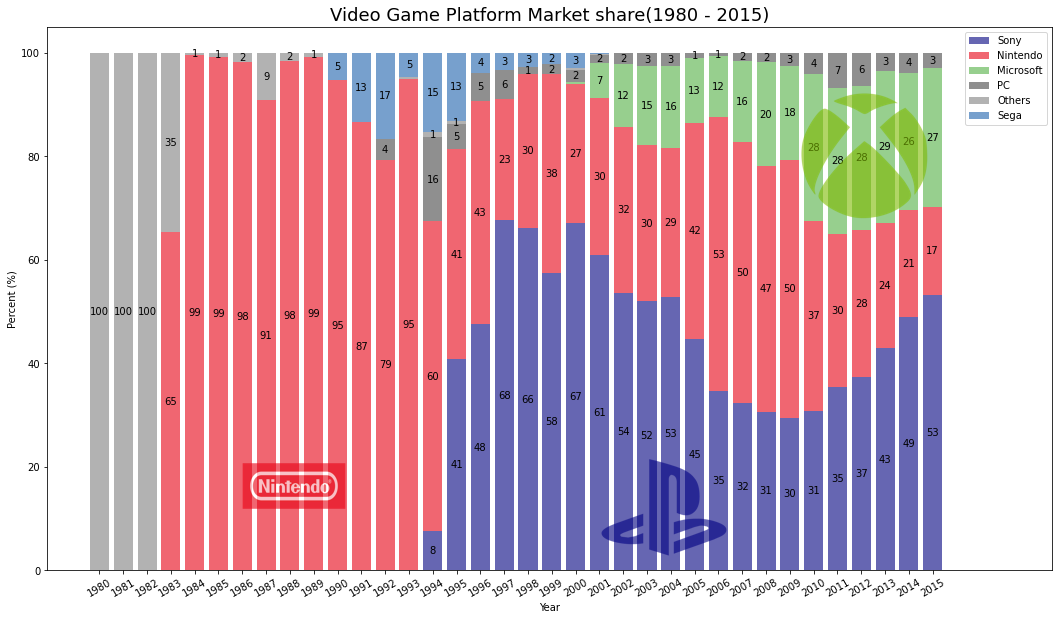

In [15]:
fig, ax = plt.subplots(1,1,figsize=(18,10))

Year = Global_sales_by_year_platform['Year'].unique()
bottom = pd.Series(index=Year,data=[0]*len(Year))
handle_list=[]

for x in platform_list:
    temp_df = Global_sales_by_year_platform[Global_sales_by_year_platform['Platform_manfacturer'] == x]

    temp_df.loc[:,'bottom']=temp_df['Year'].copy().map(bottom)
    handle = plt.bar(data=temp_df, x='Year', height='Market_share',bottom=bottom[temp_df['Year']], color=color_series[x], alpha = 0.6) 
    for year, share in temp_df.iterrows():
        if round(share['Market_share']) >0:
            plt.text(share['Year'], share['Market_share']/2 + share['bottom'],\
                     round(share['Market_share']),\
                     verticalalignment='center',horizontalalignment='center')
    bottom.loc[temp_df['Year']] = bottom[temp_df['Year']].add(temp_df.set_index('Year')['Market_share'])
ax.set_xticks(Global_sales_by_year_platform['Year'].unique())
ax.set_xticklabels(Global_sales_by_year_platform['Year'].unique(),rotation=30)
ax.legend(platform_list)
ax.set_ylabel('Percent (%)')
ax.set_xlabel('Year')
ax.set_xlim(right=2020)
ax.set_title('Video Game Platform Market share(1980 - 2015)', fontsize=18)
#ax1 = fig.add_axes([0.2,0.2,0.2,0.2], anchor='NE', zorder=1)
#a = fig.add_subplot(224, frameon=False)
#a.axis('off')
#a.imshow(sony_logo,extent =[0,5,0,1] , aspect= 6,zorder=2)
#ax.imshow(sony_logo,extent =[0,5,0,5],zorder=2)

fig.figimage(sony_logo, xo=600, yo=50, alpha=0.6)
fig.figimage(nintendo_logo, xo=230, yo=70, alpha=0.6)
fig.figimage(xbox_logo, xo=800, yo=400, alpha=0.6)


plt.show()

1. Nintendo dominated the market between 1983 and 1995. 
2. Sony rised quickly after 1995 and dominated the mark at 1997.
3. Microsoft became to emerge at 2001.

Sony, Microsoft and Nintendo are the big three of the market since 2002.

In [16]:
top10bulisher  = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20).index.tolist()

In [19]:
Global_sales_by_year_publisher = df.groupby(['Year', 'Publisher'])[['Global_Sales']].sum().reset_index().sort_values(['Year','Global_Sales'], ascending=[True,False])
Global_sales_by_year_publisher.tail(20)
Global_sales_by_year_publisher = Global_sales_by_year_publisher.merge(Global_sales_by_year,on=['Year'], how='left')
Global_sales_by_year_publisher['Market_share'] = 100* Global_sales_by_year_publisher['Global_Sales_x'] / Global_sales_by_year_publisher['Global_Sales_y']
platform_list = df.groupby('Platform_manfacturer')['Global_Sales'].sum().sort_values(ascending=False).index
color_list = sns.color_palette("tab20",n_colors=Global_sales_by_year_platform['Platform_manfacturer'].nunique())
# We will focus on the Publishers that have better market share since 1995
Global_sales_by_year_publisher

,Year,Publisher,Global_Sales_x,Global_Sales_y,Market_share
0,1980,Atari,8.36,11.38,73.462214
1,1980,Activision,3.02,11.38,26.537786
2,1981,Activision,8.50,35.77,23.762930
3,1981,Atari,8.45,35.77,23.623148
4,1981,Imagic,4.82,35.77,13.474979
...,...,...,...,...,...
2245,2015,Funbox Media,0.01,264.44,0.003782
2246,2015,Minato Station,0.01,264.44,0.003782
2247,2015,Nitroplus,0.01,264.44,0.003782
2248,2015,Rain Games,0.01,264.44,0.003782


In [21]:
Global_sales_by_year_publisher[Global_sales_by_year_publisher['Market_share'] >10]['Publisher'].nunique()

14

In [26]:
Global_sales_by_year_publisher[Global_sales_by_year_publisher['Year']>1995].groupby('Publisher')['Market_share'].sum().sort_values().tail(30)

Publisher
Enix Corporation                            6.351250
Sony Computer Entertainment Europe          6.874460
505 Games                                  10.316767
GT Interactive                             11.119959
Codemasters                                11.856865
Tecmo Koei                                 12.491024
Vivendi Games                              14.461585
Virgin Interactive                         15.251382
SquareSoft                                 15.871090
LucasArts                                  16.566821
Midway Games                               18.278485
Bethesda Softworks                         18.953690
Acclaim Entertainment                      19.940266
Disney Interactive Studios                 22.735327
Atari                                      25.999115
Eidos Interactive                          30.509185
Square Enix                                30.816624
Warner Bros. Interactive Entertainment     33.981610
Capcom                              